In [34]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
#loading the dataset

df=pd.read_csv(r"D:\Kerin\Data Science\Singularis\PROJECTS\1. Data Visualization\1. Shopping trends\shopping_trends.csv")

In [36]:
#displaying first 5 values
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [37]:
#information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [38]:
#shape of dataset

df.shape

(3900, 19)

In [39]:
#checking for null values

df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

# 1. Most common season for purchases.


<Axes: xlabel='Season', ylabel='count'>

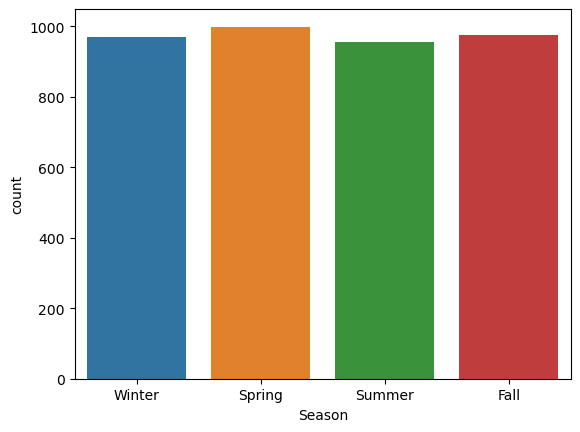

In [40]:
sns.countplot(x='Season',data=df)

from the above countplot we can see that Spring is the most common season

# 2. The total purchase amount for each gender.

In [41]:
df1=pd.DataFrame(df.groupby("Gender")['Purchase Amount (USD)'].sum())
df1

,Purchase Amount (USD)
Gender,
Female,75191
Male,157890


<Axes: xlabel='Gender', ylabel='Purchase Amount (USD)'>

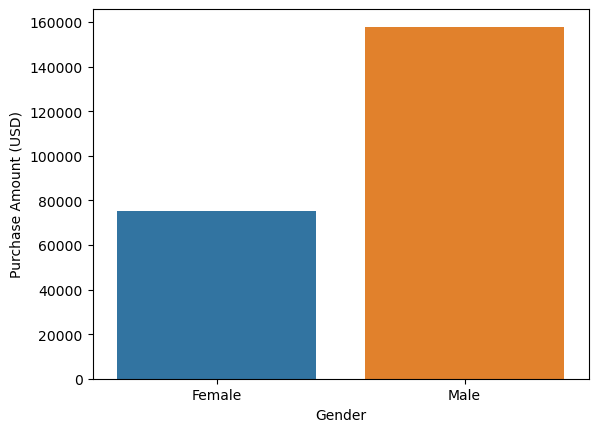

In [42]:
sns.barplot(x=df1.index,y='Purchase Amount (USD)',data=df1)

# 3. Average age of customers who made purchases in the Summer season.


In [43]:
df2= pd.DataFrame(df.groupby('Season')['Age'].mean())

df2



,Age
Season,
Fall,44.391795
Spring,44.582583
Summer,43.973822
Winter,43.307930


In [44]:
print('AVERAGE AGE OF CUSTOMERS WHO MADE PURCHASES IN THE SUMMER:',df2.loc['Summer'][0])
# df2.loc['Summer'][0]

AVERAGE AGE OF CUSTOMERS WHO MADE PURCHASES IN THE SUMMER: 43.973821989528794


<Axes: xlabel='Season', ylabel='Age'>

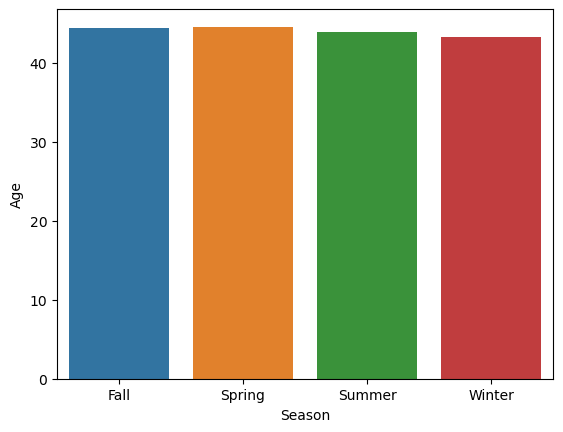

In [45]:
sns.barplot(x=df2.index,y='Age',data=df2)

# 4. Number of customers used a promo code for their purchase

In [46]:
print('No of customers that used promocode for their purchases : ',df[df['Promo Code Used']=='Yes'].shape[0])

No of customers that used promocode for their purchases :  1677


<Axes: xlabel='Promo Code Used', ylabel='count'>

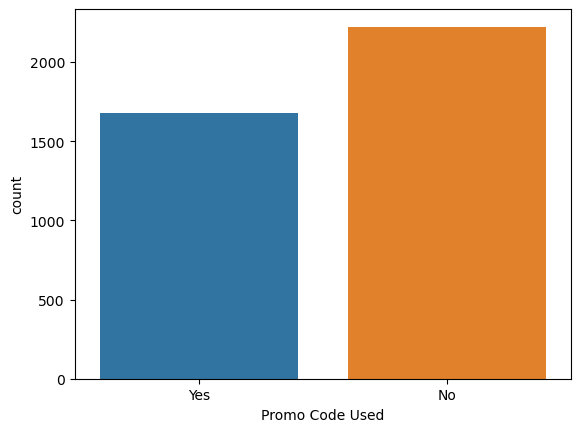

In [47]:
sns.countplot(x='Promo Code Used',data=df)

# 5. The maximum and minimum review rating in the dataset

In [48]:
print('Maximum rating:',df['Review Rating'].min())

Maximum rating: 2.5


In [49]:
print('Minimum rating:',df['Review Rating'].max())

Minimum rating: 5.0


<Axes: xlabel='Review Rating', ylabel='count'>

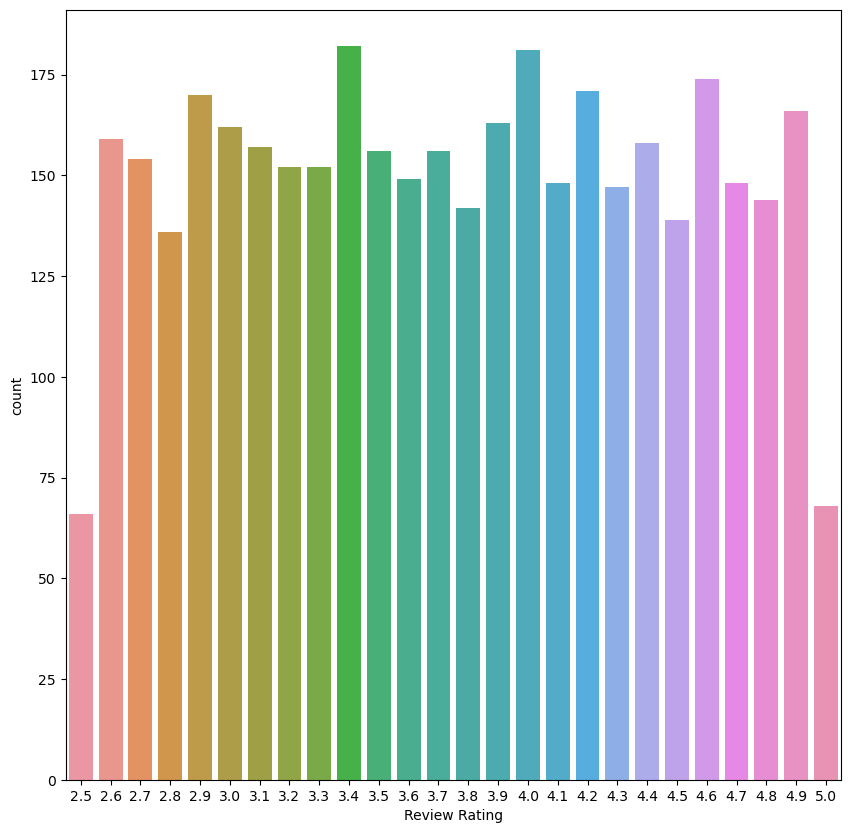

In [50]:
plt.figure(figsize=(10,10))
sns.countplot(x='Review Rating',data=df)

In [51]:
print('Maximum no of rating given: ', df['Review Rating'].value_counts().index[0])

Maximum no of rating given:  3.4


In [52]:
print('Minimum no of rating given: ', df['Review Rating'].value_counts().index[-1])

Minimum no of rating given:  2.5


In [53]:
#value counts of rating
pd.DataFrame(df['Review Rating'].value_counts())

,count
Review Rating,
3.4,182
4.0,181
4.6,174
4.2,171
2.9,170
4.9,166
3.9,163
3.0,162
2.6,159


# 6. The most common payment method for customers who shop in the Winter season

In [54]:
df[df['Season']=='Winter']['Payment Method'].value_counts()

Payment Method
Credit Card      180
Venmo            169
PayPal           164
Cash             163
Debit Card       157
Bank Transfer    138
Name: count, dtype: int64

In [55]:
print('Most common payment method for customers who shop in winter season: ',
      df[df['Season']=='Winter']['Payment Method'].value_counts().index[0])

Most common payment method for customers who shop in winter season:  Credit Card


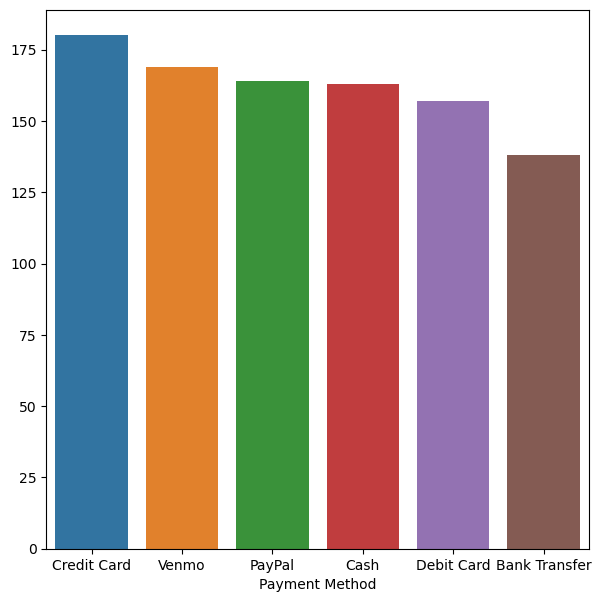

In [56]:
payment_method=df[df['Season']=='Winter']['Payment Method'].value_counts().index
count=df[df['Season']=='Winter']['Payment Method'].value_counts().values

plt.figure(figsize=(7,7))
sns.barplot(x=payment_method,y=count)
plt.show()

# 7. The most common category of items purchased by female customers with a review rating below 3


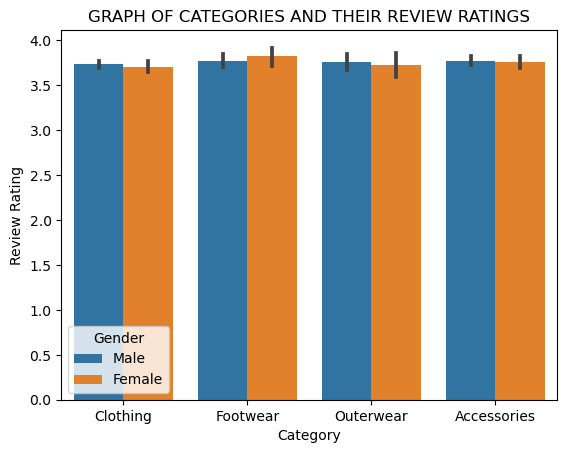

In [57]:
sns.barplot(x='Category',y='Review Rating',data=df,hue='Gender')
plt.title('GRAPH OF CATEGORIES AND THEIR REVIEW RATINGS')
plt.show()

In [58]:
print('Items purchased by female customers with a review rating below 3')
result= df[(df['Gender']=='Female') & (df['Review Rating']<3)]['Category'].value_counts()
result

Items purchased by female customers with a review rating below 3


Category
Clothing       109
Accessories     61
Footwear        34
Outerwear       20
Name: count, dtype: int64

In [59]:
print('most common category of items purchased by female customers with a review rating below 3 :',result.index[0])

most common category of items purchased by female customers with a review rating below 3 : Clothing


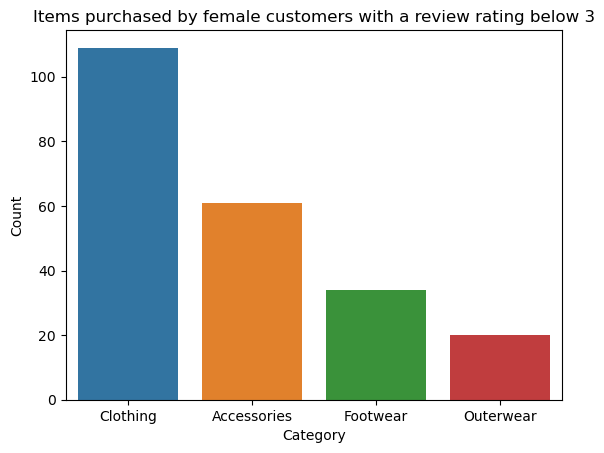

In [60]:
sns.barplot(x=result.index,y=result.values)
plt.title('Items purchased by female customers with a review rating below 3')
plt.ylabel('Count')
plt.show()

# 8. the total purchase amount for customers in each location ?


In [61]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [63]:
print('The total purchase amount for customers in each location')
result=df.groupby('Location')['Purchase Amount (USD)'].sum()
result

The total purchase amount for customers in each location


Location
Alabama           5261
Alaska            4867
Arizona           4326
Arkansas          4828
California        5605
Colorado          4222
Connecticut       4226
Delaware          4758
Florida           3798
Georgia           4645
Hawaii            3752
Idaho             5587
Illinois          5617
Indiana           4655
Iowa              4201
Kansas            3437
Kentucky          4402
Louisiana         4848
Maine             4388
Maryland          4795
Massachusetts     4384
Michigan          4533
Minnesota         4977
Mississippi       4883
Missouri          4691
Montana           5784
Nebraska          5172
Nevada            5514
New Hampshire     4219
New Jersey        3802
New Mexico        5014
New York          5257
North Carolina    4742
North Dakota      5220
Ohio              4649
Oklahoma          4376
Oregon            4243
Pennsylvania      4926
Rhode Island      3871
South Carolina    4439
South Dakota      4236
Tennessee         4772
Texas             4712
Ut

<Axes: ylabel='Location'>

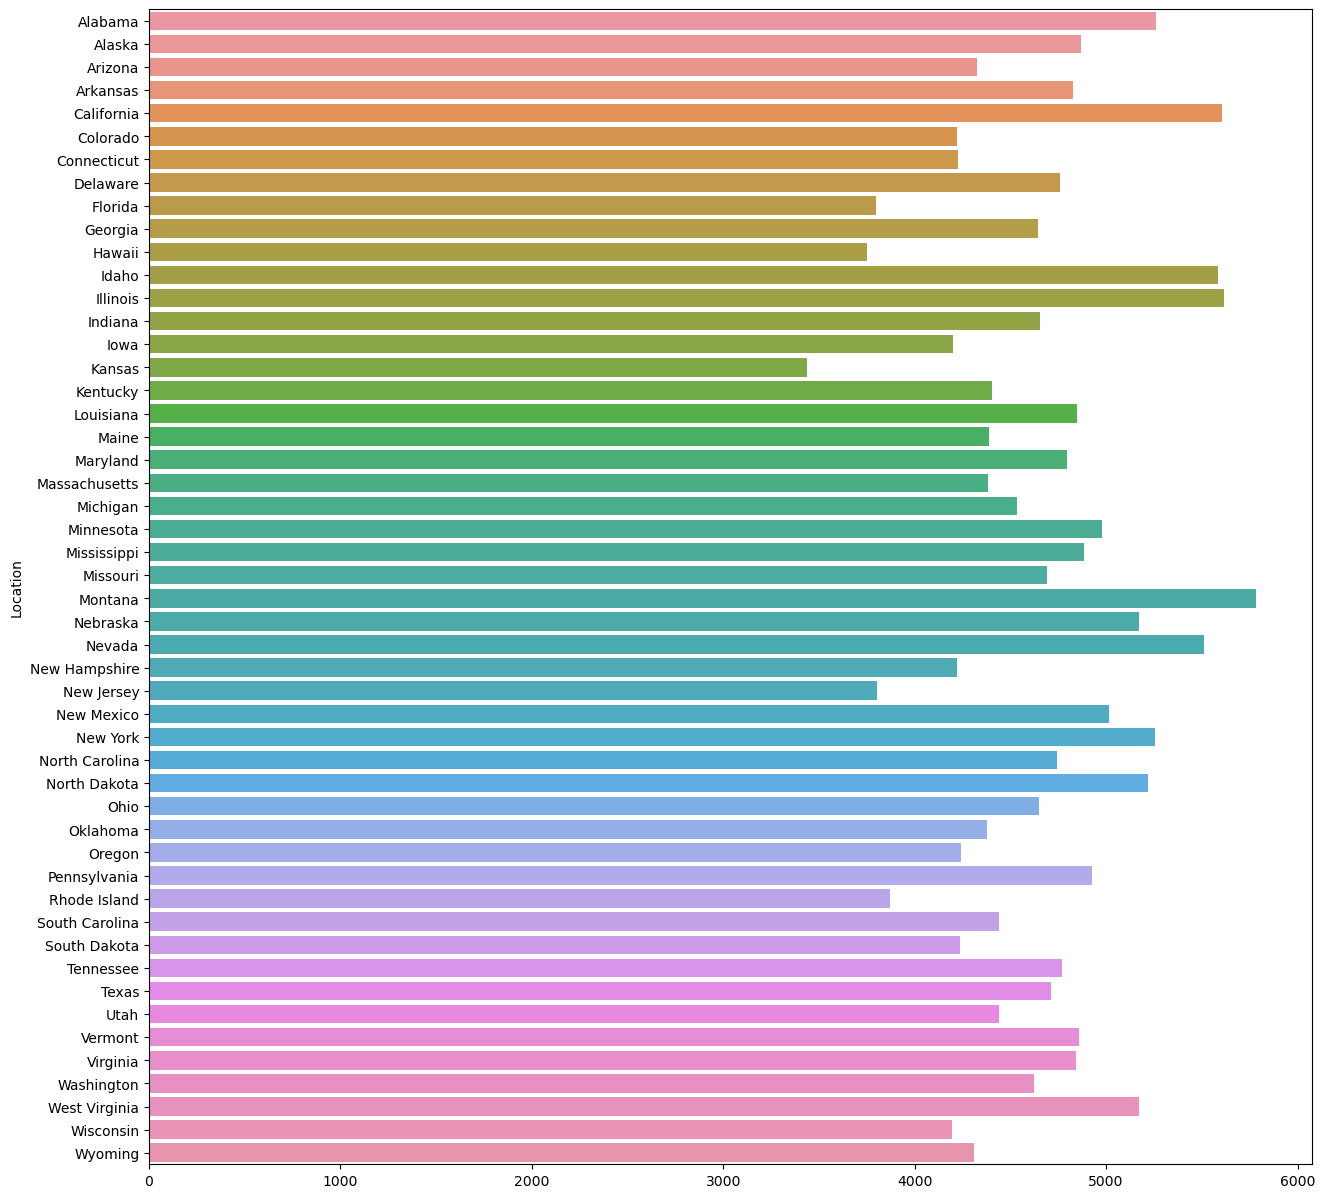

In [64]:
location=result.index
purchase_amt=result.values
plt.figure(figsize=(15,15))
sns.barplot(y=location,x=purchase_amt)

# 9. Correlation between different numerical columns

In [65]:
#finding the columns with numerical data types

num_cols=df.select_dtypes(include=['int','float'])
num_cols

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
0,1,55,53,3.1,14
1,2,19,64,3.1,2
2,3,50,73,3.1,23
3,4,21,90,3.5,49
4,5,45,49,2.7,31
...,...,...,...,...,...
3895,3896,40,28,4.2,32
3896,3897,52,49,4.5,41
3897,3898,46,33,2.9,24
3898,3899,44,77,3.8,24


In [66]:
#dropping customer id
num_cols.drop('Customer ID',axis=1,inplace=True)

In [67]:
num_cols.corr()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
Age,1.000000,-0.010424,-0.021949,0.040445
Purchase Amount (USD),-0.010424,1.000000,0.030776,0.008063
Review Rating,-0.021949,0.030776,1.000000,0.004229
Previous Purchases,0.040445,0.008063,0.004229,1.000000


<Axes: >

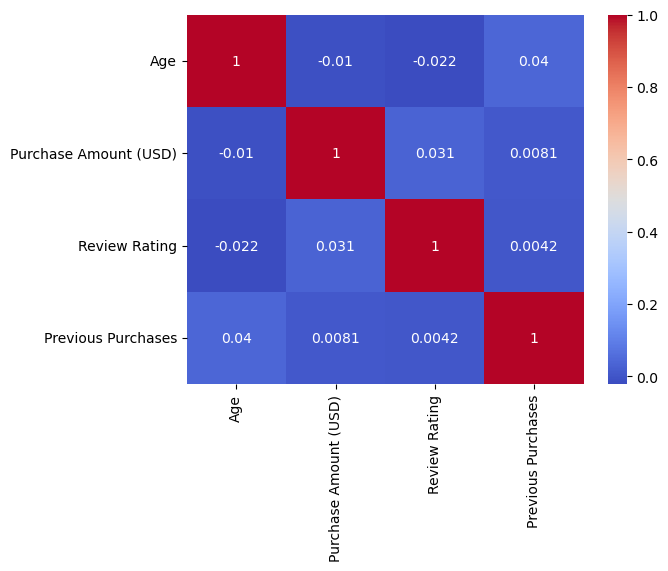

In [68]:
#Plotting the correlation between different numerical columns

sns.heatmap(num_cols.corr(),annot=True,cmap='coolwarm')

# 10. The Histogram of Age Distribution

Text(0.5, 0, 'Age')

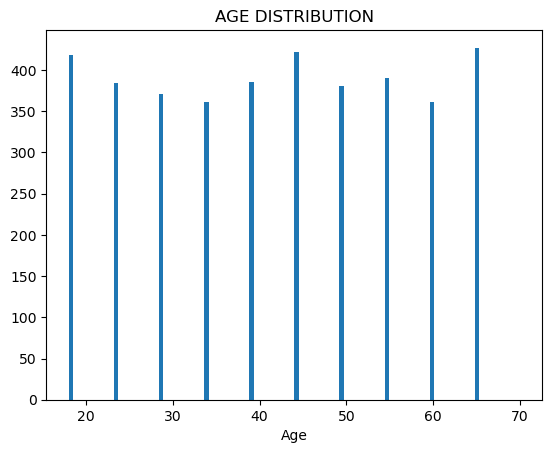

In [69]:
plt.hist(df.Age,width=0.5)
plt.title('AGE DISTRIBUTION')
plt.xlabel('Age')

# 11. The distribution of customers by age and gender

<Axes: xlabel='Age', ylabel='count'>

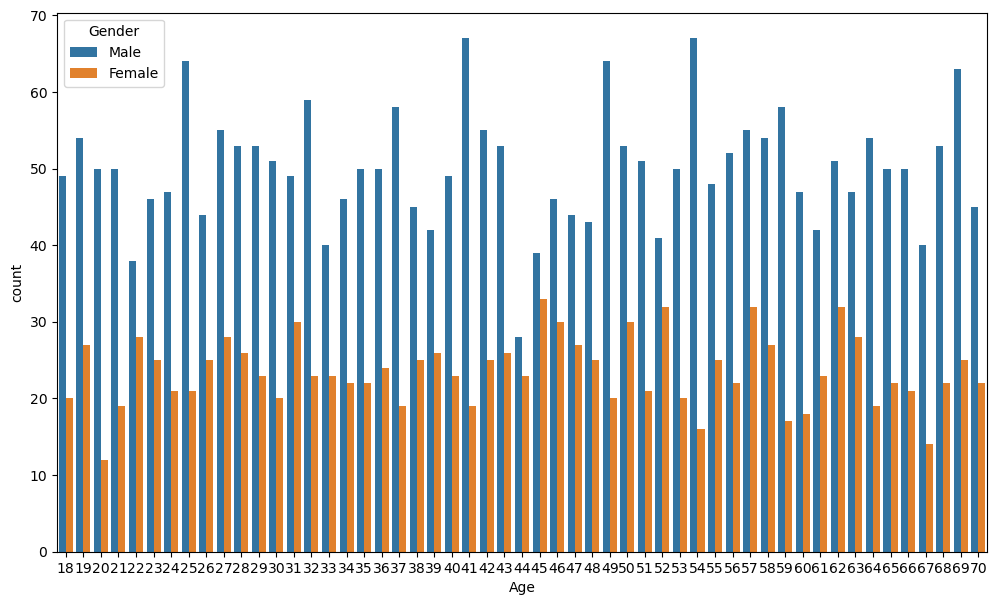

In [70]:
plt.figure(figsize=(12,7))
sns.countplot(x='Age', data=df,hue='Gender')

In [71]:
pd.DataFrame(df.groupby('Gender')['Age'].value_counts())

count
Gender Age       
Female 45      33
       52      32
       57      32
       62      32
       31      30
...           ...
Male   67      40
       33      40
       45      39
       22      38
       44      28

[106 rows x 1 columns]

# 12. Regions or locations have the highest number of customers

<Axes: xlabel='count', ylabel='Location'>

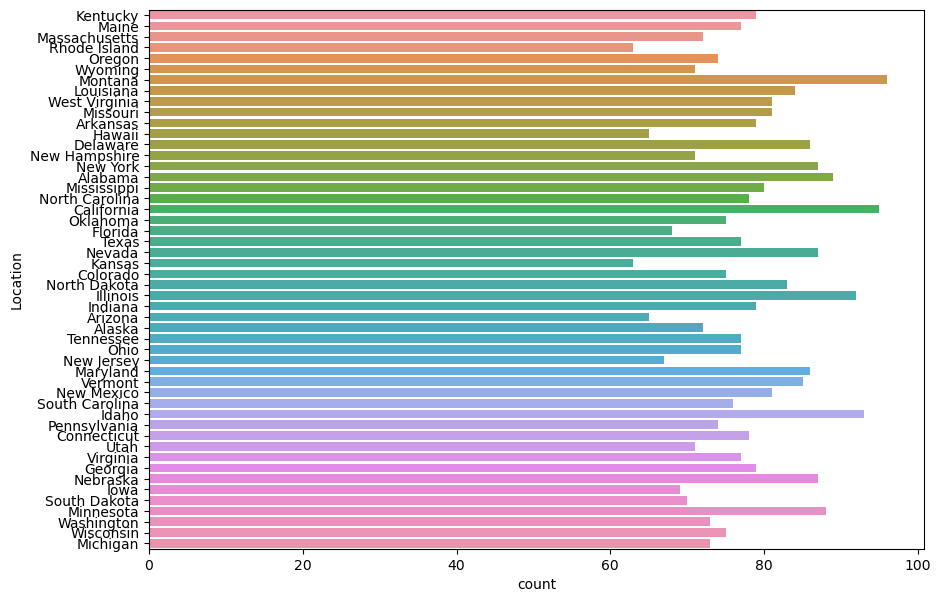

In [72]:
plt.figure(figsize=(10,7))
sns.countplot(y=df.Location)

In [73]:
df.Location.value_counts()

Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West Virginia     81
New Mexico        81
Mississippi       80
Indiana           79
Georgia           79
Kentucky          79
Arkansas          79
North Carolina    78
Connecticut       78
Virginia          77
Ohio              77
Tennessee         77
Texas             77
Maine             77
South Carolina    76
Colorado          75
Oklahoma          75
Wisconsin         75
Oregon            74
Pennsylvania      74
Washington        73
Michigan          73
Alaska            72
Massachusetts     72
Wyoming           71
Utah              71
New Hampshire     71
South Dakota      70
Iowa              69
Florida           68
New Jersey        67
Hawaii            65
Ariz

In [74]:
print('Top 10 regions or locations having the highest number of customers:')

result=pd.DataFrame(df.Location.value_counts()).reset_index()

result.head(10)

Top 10 regions or locations having the highest number of customers:


,Location,count
0,Montana,96
1,California,95
2,Idaho,93
3,Illinois,92
4,Alabama,89
5,Minnesota,88
6,Nebraska,87
7,New York,87
8,Nevada,87
9,Maryland,86


# 13. The most common shopping categories preferred by customers


<Axes: xlabel='Category', ylabel='count'>

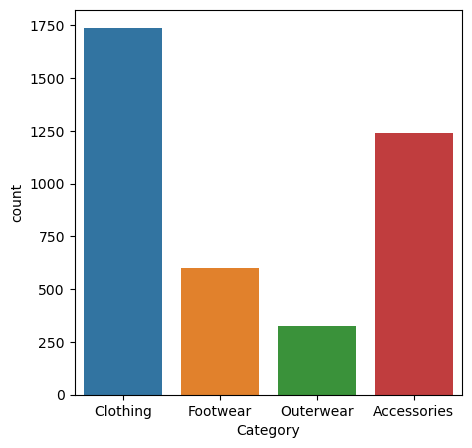

In [75]:
plt.figure(figsize=(5,5))
sns.countplot(x=df.Category)

From the above graph we can see that Clothingg and Accessories are the common shopping categories preffered by customers

# 14. Variation of the frequency of shopping by age or income group

In [76]:
df['Frequency of Purchases'].value_counts()

Frequency of Purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64

In [77]:
df.Age.value_counts()

Age
69    88
57    87
41    86
25    85
49    84
50    83
54    83
27    83
62    83
32    82
19    81
58    81
42    80
43    79
28    79
31    79
37    77
46    76
29    76
68    75
59    75
63    75
56    74
36    74
55    73
52    73
64    73
35    72
51    72
65    72
40    72
45    72
47    71
66    71
30    71
23    71
38    70
53    70
18    69
21    69
26    69
34    68
48    68
24    68
39    68
70    67
22    66
61    65
60    65
33    63
20    62
67    54
44    51
Name: count, dtype: int64

In [78]:
df2=df.copy()

In [79]:
#converting age into groups

In [80]:
bins=[0,17,24,40,60,100]
labels=['0-17','Youth(17-24)','Young_workingclass(24-40)','Older_workingclas(40-60)','Retired(60 above)']

df2['Age']=pd.cut(df2['Age'],bins=bins,labels=labels)
df2

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,Older_workingclas(40-60),Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,Youth(17-24),Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,Older_workingclas(40-60),Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,Youth(17-24),Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,Older_workingclas(40-60),Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,Young_workingclass(24-40),Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,Older_workingclas(40-60),Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,Older_workingclas(40-60),Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,Older_workingclas(40-60),Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [81]:
df2.groupby('Frequency of Purchases')['Age'].value_counts()

Frequency of Purchases  Age                      
Annually                Older_workingclas(40-60)     212
                        Young_workingclass(24-40)    164
                        Retired(60 above)            118
                        Youth(17-24)                  78
                        0-17                           0
Bi-Weekly               Older_workingclas(40-60)     217
                        Young_workingclass(24-40)    164
                        Retired(60 above)             90
                        Youth(17-24)                  76
                        0-17                           0
Every 3 Months          Older_workingclas(40-60)     219
                        Young_workingclass(24-40)    185
                        Retired(60 above)             99
                        Youth(17-24)                  81
                        0-17                           0
Fortnightly             Older_workingclas(40-60)     207
                        Young_workingc

<Axes: xlabel='Frequency of Purchases', ylabel='count'>

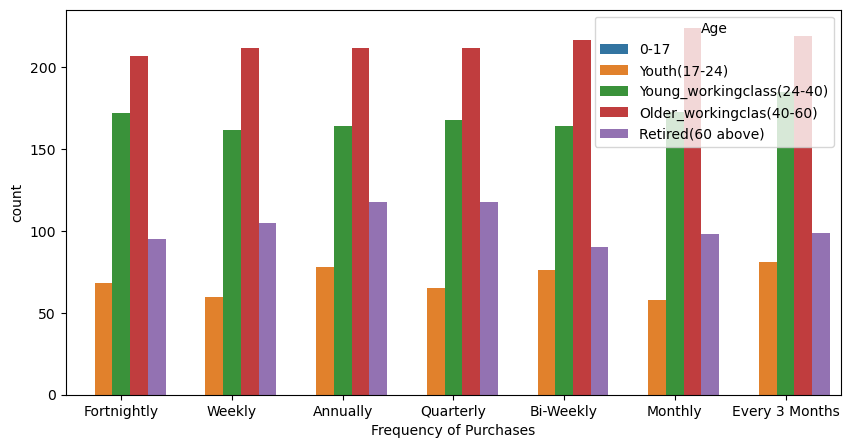

In [82]:
plt.figure(figsize=(10,5))

sns.countplot(x='Frequency of Purchases',data=df2,hue='Age')

# 15. Seasonal trends in shopping behavior

In [83]:
df.groupby('Season')['Purchase Amount (USD)'].sum()

Season
Fall      60018
Spring    58679
Summer    55777
Winter    58607
Name: Purchase Amount (USD), dtype: int64

<Axes: xlabel='Season'>

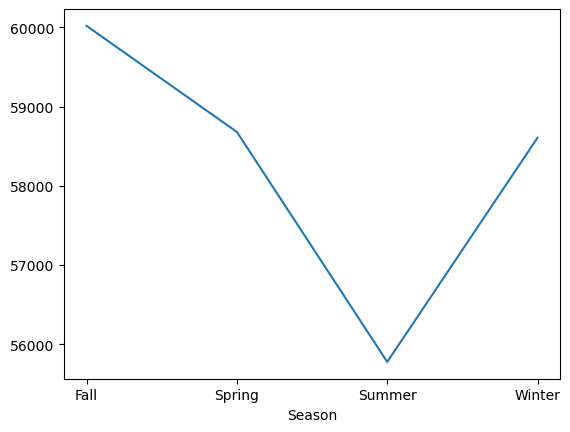

In [84]:
season=df.groupby('Season')['Purchase Amount (USD)'].sum().index
purchase_amt=df.groupby('Season')['Purchase Amount (USD)'].sum().values

sns.lineplot(x=season,y=purchase_amt)